In this assignment you can identify a dataset of your interest and perform exploratory data analysis to better understand the data, investigate initial questions about it and develop preliminary insights and hypotheses. Your final submission will be a blog post consisting of a series of captioned visualizations that convey the key insights gained over the course of your analysis. You need to post the blog to medium or your github website.

Documenting the data analysis process you went through is the main pedagogical goal of the assignment and more important than the design of the final visualization.

We will go over the details of the project during class hours next week.

##**Part 1: Select and Prepare the Data**

You should start by picking a topic area of interest to you and finding a dataset that can provide insights into that topic. We have provided some datasets below that you can start from. But we encourage you to investigate a different topic and dataset. If you self-select a dataset and are concerned about its appropriateness for the assignment, you can check with the TAs regarding the same.

**Note:** The data collection and preparation (also known as data wrangling) can be a very tedious and time-consuming process. Be sure you have sufficient time to conduct exploratory analysis, after preparing the data.

After selecting a topic and dataset – but prior to analysis – you should write down an initial set of at least three questions you’d like to investigate.

**Topic: World Happiness Report**

Data source: https://www.kaggle.com/mathurinache/world-happiness-report?select=2020.csv






## **Part 2: Exploratory Analysis**

Once you have picked the dataset and performed the initial data wrangling, you will perform exploratory analysis to investigate your data. For this assignment we would like you to use Pandas, NumPy and matplotlib to help you with the analysis. 

**Phase 1:** You should start the exploration by first examining the shape and structure of your data. What dimensions/variables does it contain and how are the data values distributed? Are there any notable data quality issues? Find out if there are missing values in the data and think of how you can handle them. Are there any surprising relationships between the dimensions/variables? Make sure to perform sanity checks for patterns you expect to see! Note that it may be the case that after doing a bit of exploration in phase 1 you find that your data is not as interesting as you first thought. In such cases you might consider returning to Part 1 and identifying a different dataset to work with. Such iteration on choosing the dataset is common, but also time-consuming, so make sure you leave time in your schedule for this.

**Phase 2:** Next, you should investigate your initial questions, as well as any new questions that arise during your exploration. For each question, create a visualization that might provide a useful answer. Then refine the visualization (by adding additional variables, changing the sort ordering or axis scales, filtering or subsetting data, etc.) to develop better perspectives explore unexpected observations, or sanity check your assumptions. You should repeat this process for each of your questions, and also feel free to revise your questions or branch off to explore new questions as the data warrants.

**Phase 1: Data shape and structure**

The World Happiness Report dataset represents the happiness of people in 153 countries using a Happiness Score, which is explained by: GDP per capita,
Healthy Life Expectancy,
Social support,
Freedom to make life choices,
Generosity,
Corruption Perception, and
Residual error.

As this data was sourced from the Gallup World Survey and published by the Sustainable Development Solutions Network, it does not contain any notable data quality issues.

**Phase 2: Investigating questions**
1. What are the top 20 happiest countries? What about the least happy? Follow up: Which geographic regions are the happiest?

2.   What's the relationship between wealth and happiness?
    Follow up: What's the relationship between happiness and other metrics like social support, life expectancy and freedom?
3. How have happiness levels shifted over time? Follow up: How have they changed specifically for the United States?

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt


# Read data into a data frame
df = pd.read_csv("2020.csv")
print(df)

                 Country name  ... Dystopia + residual
0                     Finland  ...            2.762835
1                     Denmark  ...            2.432741
2                 Switzerland  ...            2.350267
3                     Iceland  ...            2.460688
4                      Norway  ...            2.168266
..                        ...  ...                 ...
148  Central African Republic  ...            2.860198
149                    Rwanda  ...            0.548445
150                  Zimbabwe  ...            0.841031
151               South Sudan  ...            1.378751
152               Afghanistan  ...            1.507236

[153 rows x 20 columns]


**1a. The Top 20 Happiest Countries**

I was not surprised to find Scandanavian countries at the top of the list, but I was surprised to find New Zealand, Israel and Costa Rica on the list, all of which were above the United States, which was near the bottom of this list at number 18.

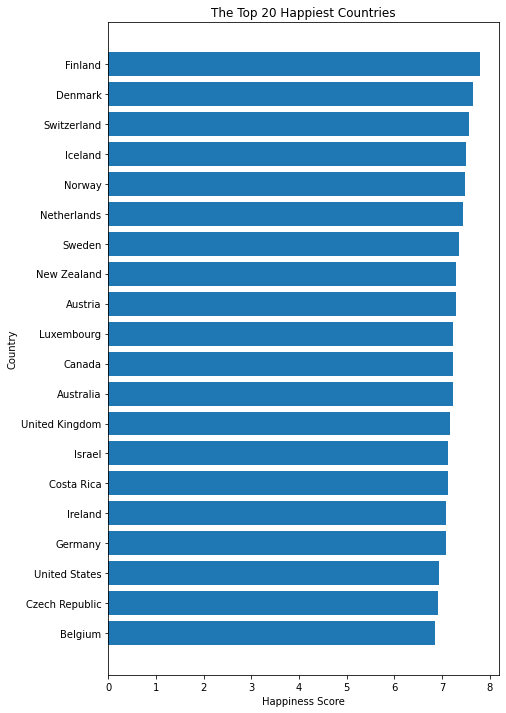

In [2]:
# TABLE VIEW
top20 = df.head(20)

# BAR GRAPH VIEW
plt.figure(figsize=(7, 12))


# Add title
plt.title("The Top 20 Happiest Countries")

# Add labels
plt.xlabel('Happiness Score')
plt.ylabel('Country')

# Make bar graph
plt.barh(top20['Country name'], top20['Ladder score'], align='center')

# Invert bar order
plt.gca().invert_yaxis()



**1b. The Top 20 Least Happy Countries**

I hypothesized that there would be significantly more variation in the happiness scores of the bottom 20 countries as compared to the top 20 countries. My underlying assumption was that there would be a certain threshold of happiness after which differences in happiness levels would be negligible, as opposed to a wider range of happiness that the bottom 20 countries might experience being beneath this threshold. This appeared to be the case when I graphed these values by the default x-axis range (from 0 to 4), which was set according to the largest score in the list. However, upon changing the range from 0 to 8 to match that of the top 20 happiest countries, I noticed that the the scores did not vary as much as it first appeared, although they did vary more than that of the top 20 happiest countries nonetheless. 

(0.0, 8.0)

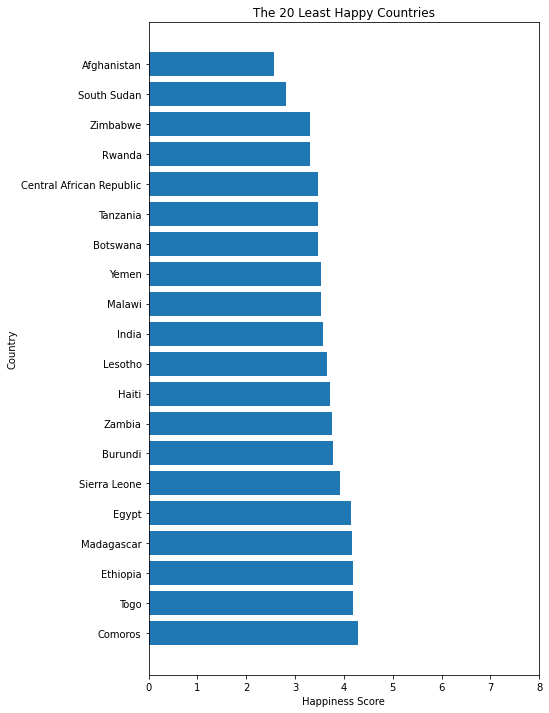

In [3]:
# TABLE VIEW
bot20 = df.tail(20)

# BAR GRAPH VIEW
plt.figure(figsize=(7, 12))


# Add title
plt.title("The 20 Least Happy Countries")

# Add labels
plt.xlabel('Happiness Score')
plt.ylabel('Country')

# Make bar graph
plt.barh(bot20['Country name'], bot20['Ladder score'], align='center')

# Set x-axis range
plt.xlim([0,8])


**1c. Geographic Region and Happiness**

                                    Ladder score  ...  Dystopia + residual
Regional indicator                                ...                     
Central and Eastern Europe            100.024900  ...            34.565801
Commonwealth of Independent States     64.300099  ...            21.441540
East Asia                              34.289100  ...             9.413199
Latin America and Caribbean           125.617500  ...            48.476114
Middle East and North Africa           88.861701  ...            29.682839
North America and ANZ                  28.694100  ...             8.797306
South Asia                             31.328099  ...            10.697855
Southeast Asia                         48.450300  ...            13.722045
Sub-Saharan Africa                    170.956300  ...            79.528363
Western Europe                        144.883600  ...            45.439402

[10 rows x 18 columns]
['Central and Eastern Europe', 'Commonwealth of Independent States', 'East A

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

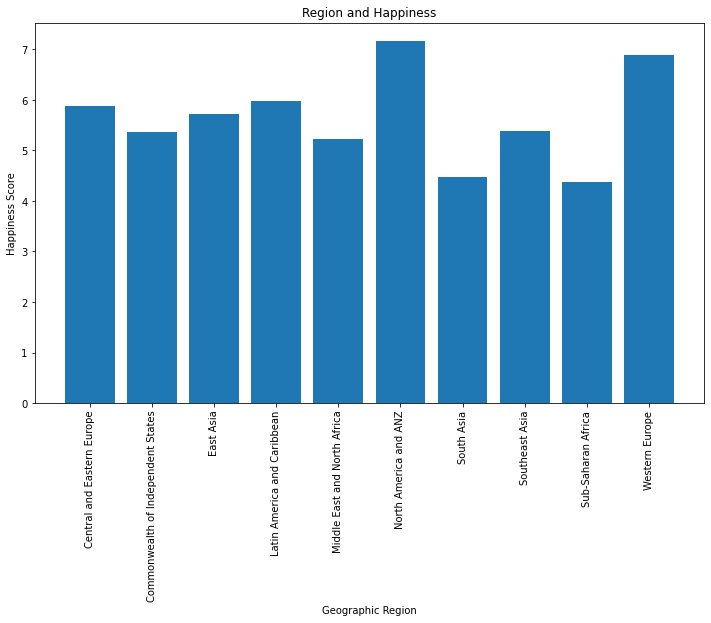

In [4]:
# Investigate which regions have the highest happiness scores

# Group by region
region = df.groupby('Regional indicator').sum() # Regional indicator becomes index
print(region)

# Initialize dict with count of countries that fall in each region
regionDict = {}
# Iterate through df and count the number of matching vals in each region
for r in df['Regional indicator']:
  # Add unique regions to the map and initialize count to 1
  if r not in regionDict:
    regionDict[r] = 1;
  # Increment the count for regions already in the dictionary
  else:
    regionDict[r] += 1;

# Sort the dictionary
sortedDict =sorted(regionDict.keys(), key=lambda x:x.lower())
print(sortedDict)

# Create a new column for the number of countries in each region
region['Num countries'] = region.index.map(regionDict)

# Create a new column for the average ladder score
region['Average score'] = region['Ladder score']/region['Num countries']

# print(regionDict)
# print(region)

# Plot a bar chart of the average happiness score per region

# Set figure size
plt.figure(figsize=(12, 7))

# Add title
plt.title("Region and Happiness")

# Add labels
plt.xlabel('Geographic Region')
plt.ylabel('Happiness Score')

# Plot the GDP and Happiness Scores
plt.bar(sortedDict, region['Average score'], align='center')

# Rotate regions
plt.xticks(rotation = 90)

**2a. Wealth and Happiness**

                 Country name  ... Logged GDP per capita
0                     Finland  ...             10.639267
1                     Denmark  ...             10.774001
2                 Switzerland  ...             10.979933
3                     Iceland  ...             10.772559
4                      Norway  ...             11.087804
..                        ...  ...                   ...
148  Central African Republic  ...              6.625160
149                    Rwanda  ...              7.600104
150                  Zimbabwe  ...              7.865712
151               South Sudan  ...              7.425360
152               Afghanistan  ...              7.462861

[153 rows x 4 columns]


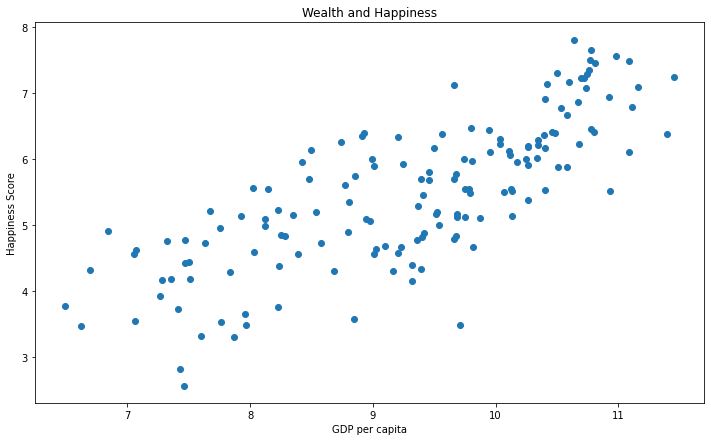

In [5]:
# Investigate the relationship between GDP and happiness score

gdp = pd.read_csv("2020.csv", usecols=['Country name', 'Regional indicator', 'Ladder score', 'Logged GDP per capita'])
print(gdp)

# Set figure size
plt.figure(figsize=(12, 7))


# Add title
plt.title("Wealth and Happiness")

# Add labels
plt.xlabel('GDP per capita')
plt.ylabel('Happiness Score')

# Plot the GDP and Happiness Scores

plt.scatter(gdp['Logged GDP per capita'], gdp['Ladder score'], marker='o')



**2b. A Holistic Picture of Happiness Metrics (Self-Reported Perceptions)**

Text(0.5, 0.98, 'Happiness and Self-Reported Perceptions')

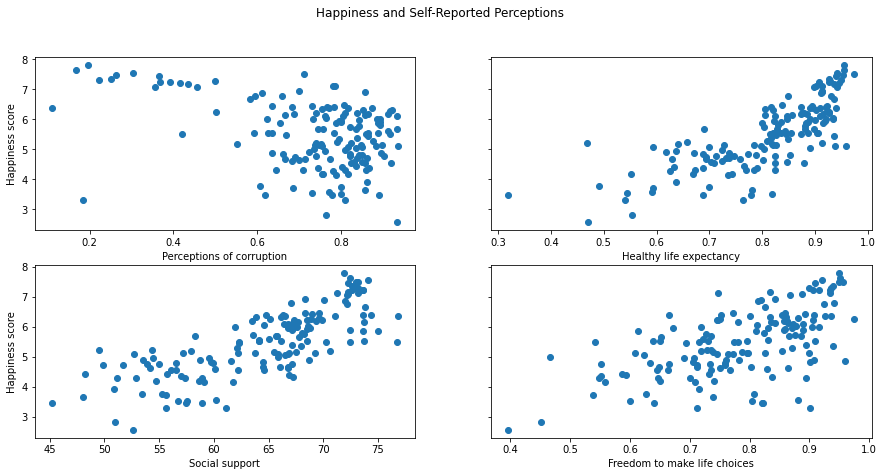

In [6]:
fig, myAxes = plt.subplots(2, 2, sharex=False, sharey=True) # share y axis

fig.set_figheight(7)
fig.set_figwidth(15)

myAxes[0,0].scatter(df['Perceptions of corruption'], df['Ladder score'])
myAxes[0,1].scatter(df['Social support'], df['Ladder score'])
myAxes[1,0].scatter(df['Healthy life expectancy'], df['Ladder score'])
myAxes[1,1].scatter(df['Freedom to make life choices'], df['Ladder score'])

# Set y labels
myAxes[0,0].set_ylabel('Happiness score')
myAxes[1,0].set_ylabel('Happiness score')

#Set x labels
myAxes[0,0].set_xlabel('Perceptions of corruption')
myAxes[1,0].set_xlabel('Social support')

myAxes[0,1].set_xlabel('Healthy life expectancy')
myAxes[1,1].set_xlabel('Freedom to make life choices')

# myAxes[1,0].set_ylim([0.8,2])
fig.suptitle('Happiness and Self-Reported Perceptions')

# Rotate date
# myAxes[0,0].set_xticklabels(myAxes[0,0].get_xticks(), roation=90)
# myAxes.xticks(x, labels, rotation='vertical')

# myAxes[0,0].tick_params(axis='x', labelrotation = 90)
# myAxes[0,0].tick_params(labelrotation=90)

# for ax in fig.axes:
#     plt.sca(ax)
#     plt.xticks(rotation=90)

**3. Average Happiness Over Time**

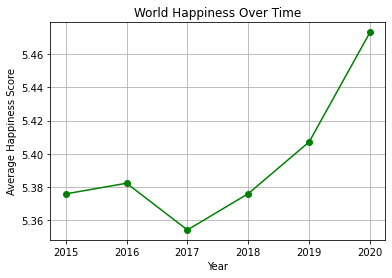

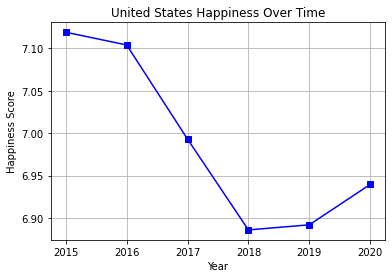

In [9]:
# Read in each year as a new df
df15 = pd.read_csv("2015.csv")
df16 = pd.read_csv("2016.csv")
df17 = pd.read_csv("2017.csv")
df18 = pd.read_csv("2018.csv")
df19 = pd.read_csv("2019.csv")
df20 = pd.read_csv("2020.csv")

# Get the world average happiness scores
avg15 = df15['Happiness Score'].mean()
avg16 = df16['Happiness Score'].mean()
avg17 = df17['Happiness.Score'].mean()
avg18 = df18['Score'].mean()
avg19 = df19['Score'].mean()
avg20 = df20['Ladder score'].mean()

# Set the index of each df to 'Country'
newDf15 = df15.set_index('Country')
newDf16 = df16.set_index('Country')
newDf17 = df17.set_index('Country')
newDf18 = df18.set_index('Country or region')
newDf19 = df19.set_index('Country or region')
newDf20 = df20.set_index('Country name')

# Get the USA happiness score from each year
usaAvg15 = newDf15.loc['United States', 'Happiness Score']
usaAvg16 = newDf16.loc['United States', 'Happiness Score']
usaAvg17 = newDf17.loc['United States', 'Happiness.Score']
usaAvg18 = newDf18.loc['United States', 'Score']
usaAvg19 = newDf19.loc['United States', 'Score']
usaAvg20 = newDf20.loc['United States', 'Ladder score']

# Initialize list of years and average scores
year = [2015, 2016, 2017, 2018, 2019, 2020]
worldAvgs = [avg15, avg16, avg17, avg18, avg19, avg20]
usaAvgs = [usaAvg15, usaAvg16, usaAvg17, usaAvg18, usaAvg19, usaAvg20]

# Add title
plt.title('World Happiness Over Time')

# Add labels
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')

# Add grid
plt.grid(True)

# WORLD: Make a line plot with year as the x-axis and average happiness score as y-axis
worldPlot = plt.plot(year, worldAvgs, marker='o', color='g', label="World")
plt.show()

# Add title
plt.title('United States Happiness Over Time')

# Add labels
plt.xlabel('Year')
plt.ylabel('Happiness Score')

# Add grid
plt.grid(True)

# USA: Make a line plot with year as the x-axis and average happiness score as y-axis
usaPlot = plt.plot(year, usaAvgs, marker='s', color='b', label="United States")
plt.show()





## **Final Deliverable**

Your final submission should take the form of a blog post that consists of 10 or more captioned visualizations detailing your most important insights. You will also work on posting the blog to medium or your github website. Your “insights” can include important surprises or issues (such as data quality problems affecting your analysis) as well as responses to your analysis questions.

Each visualization image should be a screenshot accompanied with a title and descriptive caption (1-4 sentences long) describing the insight(s) learned from that view. Provide sufficient detail for each caption such that anyone could read through your report and understand what you’ve learned. You are free, but not required, to annotate your images to draw attention to specific features of the data. 

Do not submit a blog cluttered with everything little thing you tried. Submit a clean report that highlights the most important “milestones” in your exploration, which can include initial overviews, identification of data quality problems, confirmations of key assumptions, and potential “discoveries”. Your blog should only present the final dataset you analyzed and should not describe any iterations on earlier datasets you might have initially explored.

## **Data Sources**

There are a variety of data sources available online. Here are some possible sources to consider. If you have any questions about whether your dataset is appropriate, please talk to the TAs.

**Data is Plural** - Variety of datasets and sources covering many topics.

https://data.gov - U.S. Government open datasets.

U.S. Census Bureau - Census data - https://data.census.gov/

Federal Elections Commission - Campaign finance and expenditures. - https://www.fec.gov/data/

Federal Aviation Administration - FAA data - https://www.faa.gov/data_research/

https://www.kaggle.com/

https://archive.ics.uci.edu/ml/index.php

https://github.com/awesomedata/awesome-public-datasets - Awesome Public Datasets - Variety of public datasets.

Stanford Cable TV News Analyzer - We have recently released a tool that can be used to analyze who and what appears in the last decade of Cable TV News (i.e. CNN, Fox News, MSNBC). The site lets you download data as well which you could use to conduct further analysis. - https://tvnews.stanford.edu/data

### **Visualization Tool (matplotlib, seaborn, etc)**

One goal of this assignment is for you to learn to use and evaluate the effectiveness of these packages. In addition to these packages, you are free to also use other visualization tools as you see fit, for example, you could also take a look at Tableau.

### **Data Wrangling Tools**

The data you choose may require reformatting, transformation or cleaning prior to visualization. You can use Pandas for data preparation. 

### **Grading**

Each submission will be graded based on both the analysis process and the included visualizations. Here are our grading criteria:

**Appropriate Data Assessment (5):** Overview/understanding of the data is built from transformations and appropriate assessment of data quality. Poses clear questions.

**Exploration Thoroughness (5):** Sufficient breadth of analysis, exploring questions in sufficient depth (with appropriate follow-up questions).

**Documentation (Blog) (5):** Clear documentation of exploratory process, including clearly written, understandable captions that communicate primary insights.

**Appropriate use of Numpy, Pandas, and Matplotlib (5)**  to ingest, clean, and present the data

### **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (03/05/2021)

To submit your assignment, download your notebook and zip all the necessary files(data files). Submit the zipped file to balckboard. Make sure the notebook and the zipped file is named in the format - EDA_LastName_FirstName. Be sure to include the link to access your blog in your notebook.

Also include the link to your notebook in the submission. 

We will provide more details on the blog during the next week of class.

**Note** - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.